<a href="https://colab.research.google.com/github/R2D2-like/roomba_hack/blob/tsuji/%E4%B8%8A%E5%8D%8A%E5%88%86%E3%83%9E%E3%82%B9%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving objects.jpeg to objects.jpeg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(3024, 4032, 3)
1512.0


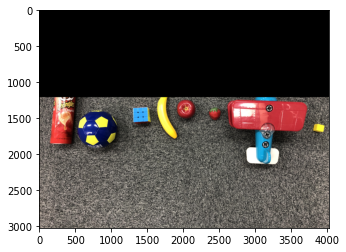

In [36]:
image = cv2.imread('objects.jpeg') # ファイル読み込み
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 画像をHSVに変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rec = np.zeros_like(image)
print(rec.shape)
a = rec.shape[0]/2
print(a)
cv2.rectangle(rec, (0,int(rec.shape[0]*2/5)), (int(rec.shape[1]),int(rec.shape[0])), (255, 255, 255), -1)

croped = cv2.bitwise_and(image, rec)
plt.imshow(croped)

In [50]:


# HSVでの色抽出
hsvLower = np.array([20, 80, 10])    # 抽出する色の下限(HSV)
hsvUpper = np.array([50, 255, 255])    # 抽出する色の上限(HSV)
hsv = cv2.cvtColor(croped, cv2.COLOR_RGB2HSV) # 画像をHSVに変換
hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSVからマスクを作成
#result = cv2.bitwise_and(image, image, mask=hsv_mask)

    # 赤色のHSVの値域1
hsv_min = np.array([0,64,0])
hsv_max = np.array([30,255,255])
mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
hsv_min = np.array([150,64,0])
hsv_max = np.array([179,255,255])
mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

# 青色のHSVの値域1
hsv_min = np.array([90, 64, 0])
hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
mask3 = cv2.inRange(hsv, hsv_min, hsv_max)

   # 緑色のHSVの値域1
hsv_min = np.array([30, 64, 0])
hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
mask4 = cv2.inRange(hsv, hsv_min, hsv_max)


mask = hsv_mask + mask1 + mask2 + mask3 + mask4
croped = cv2.cvtColor(croped, cv2.COLOR_BGR2RGB)
result = cv2.bitwise_and(croped, croped, mask=mask)

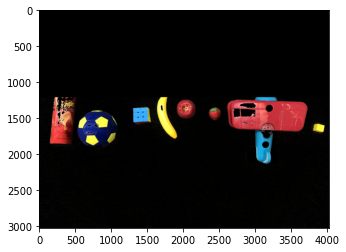

In [51]:
plt.imshow(result)

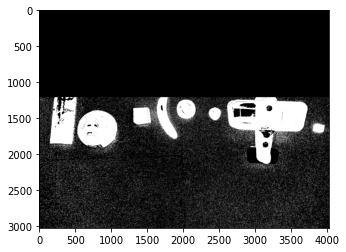

In [52]:
plt.imshow(mask, cmap='gray')

In [53]:
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt


# def imshow(img, format=".jpg", **kwargs):
#     """ndarray 配列をインラインで Notebook 上に表示する。
#     """
#     img = cv2.imencode(format, img)[1]
#     img = display.Image(img, **kwargs)
#     display.display(img)


def draw_contours(img, contours, ax):
    """輪郭の点及び線を画像上に描画する。
    """
    ax.imshow(img)
    ax.set_axis_off()

    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="r", size="20", bbox=dict(fc="w"))

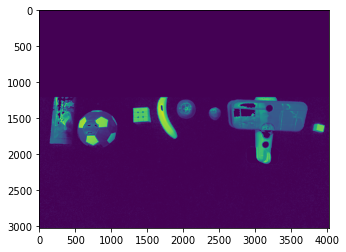

In [54]:
gray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

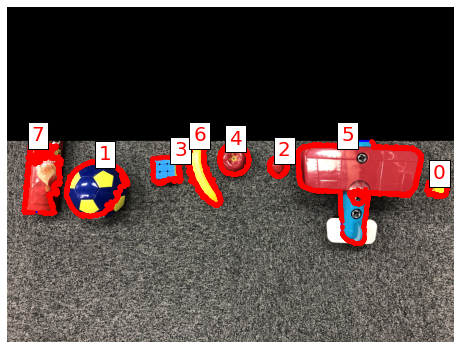

In [57]:
# # 画像を読み込む。
# img = cv2.imread("sample.jpg")

# # グレースケールに変換する。
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # 2値化する
ret, bin_img = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)

# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
contours2 = list(filter(lambda x: cv2.contourArea(x) >= 15000, contours))
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(croped, contours2, ax)
plt.show()

contour: 0, topleft: (3783, 1555), width: 192, height: 156
contour: 1, topleft: (533, 1383), width: 555, height: 506
contour: 2, topleft: (2359, 1348), width: 171, height: 183
contour: 3, topleft: (1309, 1342), width: 258, height: 247
contour: 4, topleft: (1909, 1240), width: 275, height: 270
contour: 5, topleft: (2614, 1209), width: 1127, height: 927
contour: 6, topleft: (1608, 1209), width: 322, height: 581
contour: 7, topleft: (144, 1209), width: 339, height: 653


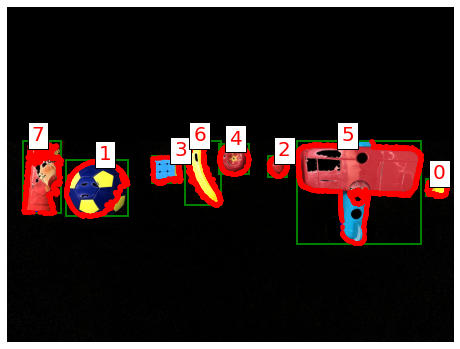

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(result, contours2, ax)

for i, cnt in enumerate(contours2):
    # 輪郭に外接する長方形を取得する。
    x, y, width, height = cv2.boundingRect(cnt)
    print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")

    # 長方形を描画する。
    ax.add_patch(
        plt.Rectangle(xy=(x, y), width=width, height=height, color="g", fill=None, lw=2)
    )

plt.show()

a
a
a
a
a
a
a
a


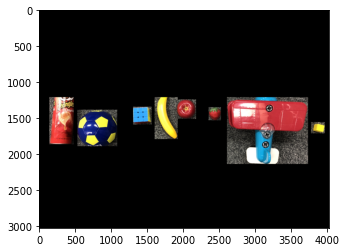

In [60]:
tmp_mask = np.zeros_like(mask)
for i, cnt in enumerate(contours2):
    # 輪郭に外接する長方形を取得する。
    x, y, width, height = cv2.boundingRect(cnt)
    
    tmp_mask[y:y+height, x:x+width] = 1
    print('a')
    
fin = cv2.bitwise_and(croped, croped, mask=tmp_mask)
    #print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")
plt.imshow(fin)

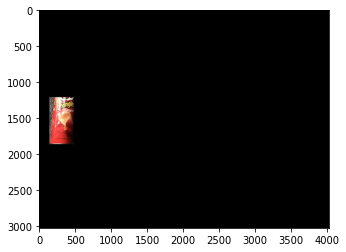

In [61]:
for i, cnt in enumerate(contours2):
    # 輪郭に外接する長方形を取得する。
    x, y, width, height = cv2.boundingRect(cnt)
    tmp_mask = np.zeros_like(mask)
    tmp_mask[y:y+height, x:x+width] = 1
    fin = cv2.bitwise_and(croped, croped, mask=tmp_mask)
    #print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")
    plt.imshow(fin)